# **SkillifyZone Internship Week3 Task**
# **Customer Segmentation**
# **Submitted By: Muhammad Usman**

## **Import importnant Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


## **Step 01: Preprocess and Scale Dataset**

In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].values

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Step 02: Use Elbow Method for finding number of clusters**

In [5]:
wcss = []
silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

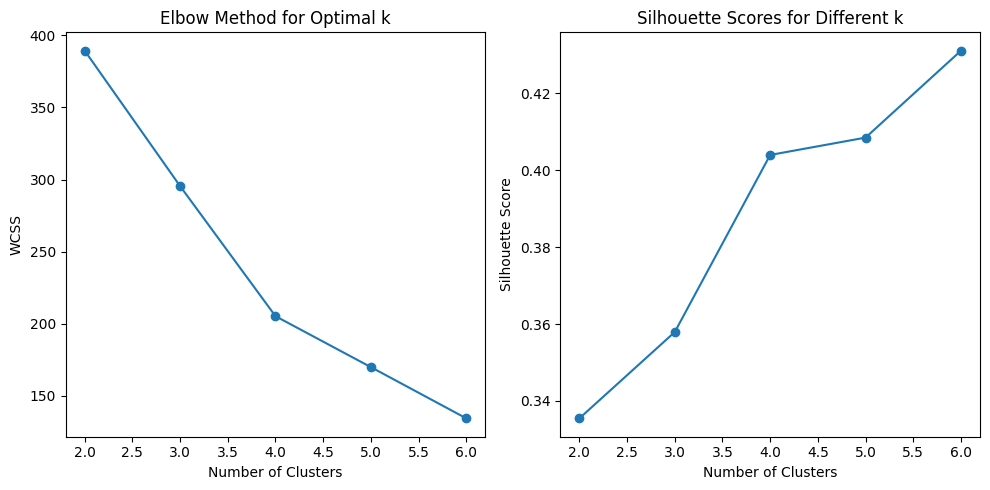

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 7), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Plot Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.savefig('elbow_silhouette.png')
plt.show()

## **Step 03: Train KMeans Model for 4 clusters, defined by elbow method**

In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [8]:
df['Cluster'] = clusters

## **Step 04: Visualizing 2D customer with the help of PCA**

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

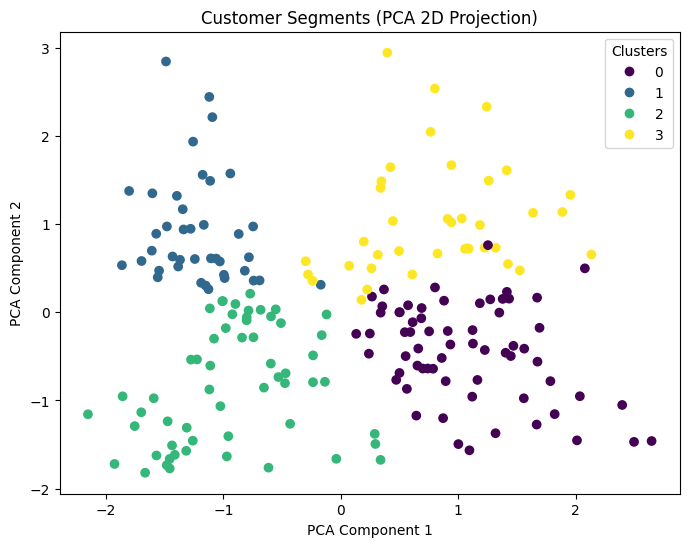

In [10]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segments (PCA 2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.savefig('customer_clusters.png')
plt.show()

## **Step 05: Types of customer in each group**

In [11]:
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()
print("Cluster Characteristics:")
for cluster in range(4):
    print(f"\nCluster {cluster}:")
    print(f"Average Annual Income: ${cluster_summary.loc[cluster, 'Annual Income (k$)']:.2f}k")
    print(f"Average Spending Score: {cluster_summary.loc[cluster, 'Spending Score (1-100)']:.2f}")
    print(f"Average Age: {cluster_summary.loc[cluster, 'Age']:.2f}")

Cluster Characteristics:

Cluster 0:
Average Annual Income: $47.71k
Average Spending Score: 39.97
Average Age: 53.98

Cluster 1:
Average Annual Income: $86.10k
Average Spending Score: 81.53
Average Age: 32.88

Cluster 2:
Average Annual Income: $40.00k
Average Spending Score: 60.30
Average Age: 25.44

Cluster 3:
Average Annual Income: $86.50k
Average Spending Score: 19.58
Average Age: 39.37


In [13]:
descriptions = {
    0: "Young, high-income, high-spending customers: Trendy spenders who frequently purchase premium products.",
    1: "Older, moderate-income, low-spending customers: Conservative shoppers, possibly budget-conscious.",
    2: "Young, low-income, high-spending customers: Impulse buyers, likely spending on trendy or affordable items.",
    3: "Middle-aged, high-income, moderate-spending customers: Balanced shoppers, selective with purchases."}

In [14]:
print("\nCustomer Group Descriptions:")
for cluster, desc in descriptions.items():
    print(f"Cluster {cluster}: {desc}")


Customer Group Descriptions:
Cluster 0: Young, high-income, high-spending customers: Trendy spenders who frequently purchase premium products.
Cluster 1: Older, moderate-income, low-spending customers: Conservative shoppers, possibly budget-conscious.
Cluster 2: Young, low-income, high-spending customers: Impulse buyers, likely spending on trendy or affordable items.
Cluster 3: Middle-aged, high-income, moderate-spending customers: Balanced shoppers, selective with purchases.
